During initial attempts at fine-tuning using an augmented dataset, the training curves appeared to be quite weird.

At first I thought it might be due to the learning rate or even errors while generating the augmented images, however it turned out to be due to not properly randomizing the augmented dataset prior to commencing training.

The training curves are shown below for interest.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import caffe
import os
import numpy as np
import sys
import seaborn as sns

sys.path.append("/usr/local/caffe/tools/extra")
import parse_log as pl

sys.path.append('../')
import helpers.histogram_classifier as hc

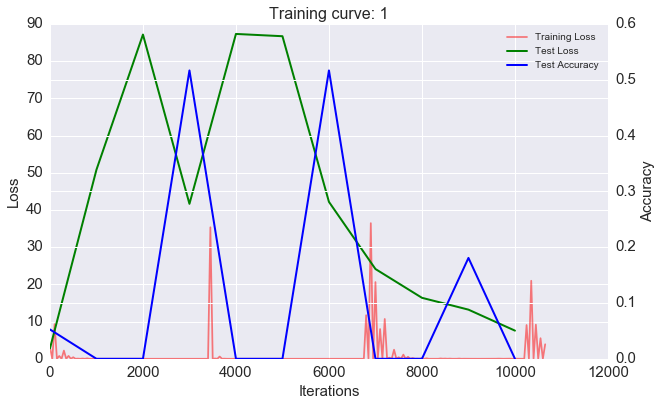

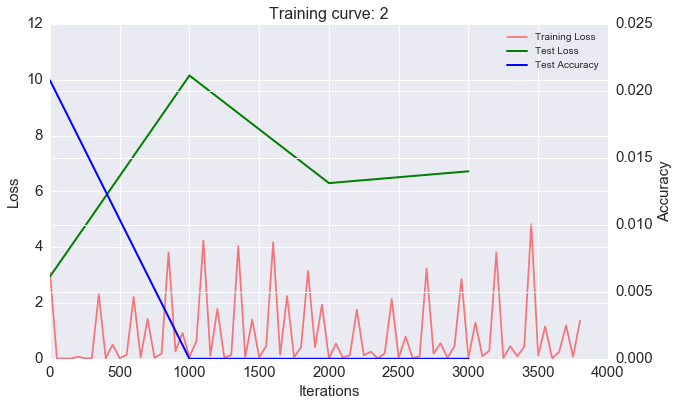

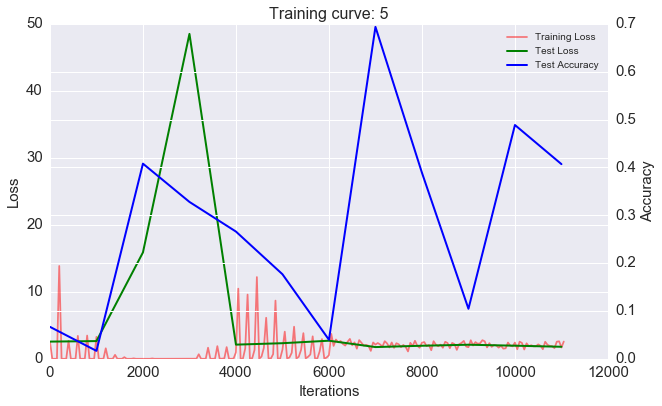

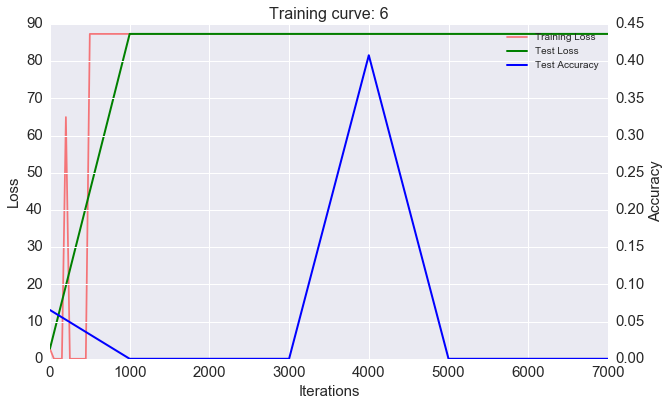

In [3]:
for i in [1, 2, 5, 6]:
    train_log, test_log = pl.parse_log("../transfer-learning/data/alexnet_4/train_{}.log".format(i))
    train_iters = [x['NumIters'] for x in train_log]
    train_loss = [x['loss'] for x in train_log]
    test_iters = [x['NumIters'] for x in test_log]
    test_loss = [x['loss'] for x in test_log]
    test_accuracy = [x['accuracy'] for x in test_log]
    fig, ax1 = plt.subplots(figsize=(10,6))

    # Plotting training and test losses
    train_l ,= ax1.plot(train_iters, train_loss, color='red',  alpha=.5, label='Training loss')
    test_l ,= ax1.plot(test_iters, test_loss, linewidth=2, color='green', label='Test loss')
    #ax1.set_ylim(ymin=0, ymax=200)
    ax1.set_xlabel('Iterations', fontsize=15)
    ax1.set_ylabel('Loss', fontsize=15)
    ax1.tick_params(labelsize=15)
    #Plotting test accuracy
    ax2 = ax1.twinx()
    test_acc ,= ax2.plot(test_iters, test_accuracy, linewidth=2, color='blue', label='Test accuracy')
    #ax2.set_ylim(ymin=0, ymax=1)
    ax2.set_ylabel('Accuracy', fontsize=15)
    ax2.tick_params(labelsize=15)
    #Adding legend
    plt.legend([train_l, test_l, test_acc], ['Training Loss', 'Test Loss', 'Test Accuracy'])
    plt.title("Training curve: {}".format(i), fontsize=16)
    plt.show()